In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')

In [2]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

In [3]:
def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:
#         print()
#         for node in open_list:
#             print("node: ", node.position)
#             print("node.g: ", node.g)
#             print("node.h: ", node.h)
#             print("node.f: ", node.f)
        
        # Get the current node
        current_node = open_list[0]
#         print("current_node: ", current_node.position)
        current_index = 0
        
        # check if the current node is has the smallest f
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
#         print("lowest_current_node: ", current_node.position)

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
#         for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue
            
#             print("child: ", node_position)

#             print("after child: ", node_position)
#             # Make sure walkable terrain
#             if maze[node_position[0]][node_position[1]] != 0:
#                 continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue
#             print(maze[current_node.position[0]][current_node.position[1]])
            # Create the f, g, and h values
            child.g = current_node.g + maze[child.position[0]][child.position[1]]
            child.h = math.sqrt(((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2))
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)

In [4]:
# maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

## Testing 

In [5]:
%%time
G = nx.drawing.nx_agraph.read_dot("mc202_trav_graph_8.dot")

CPU times: user 6.19 s, sys: 149 ms, total: 6.34 s
Wall time: 6.33 s


In [6]:
def get_neighbor_list(node):
    # create a list of all neighbors around the specified node
    neighbor_list = G.neighbors(str(node))
    neighbor_list = list(map(int, neighbor_list))
    neighbor_list = sorted(neighbor_list)
    return neighbor_list

In [7]:
def get_neighbor_weights(node, neighbor_list):
    weight_list = []
    for neighbor in neighbor_list: 
        weight = G[str(node)][str(neighbor)]['probability']
        weight_list.append(float(weight))
    return weight_list

In [8]:
# create a graph of zeros matching the size of the dot file
graph = np.zeros([140, 140])

In [9]:
# fill the array with the average of the weights
for row in range(140):
    for col in range(140):
        node = (row*140) + col
        neighbor_list = get_neighbor_list(node)
        weight_list = get_neighbor_weights(node, neighbor_list)
        graph[row][col] = 1 - (sum(weight_list)/len(weight_list))
#         graph[row][col] = 1 - max(weight_list)

#         graph[row][col] = max(weight_list)

In [10]:
# # custom function
# def sigmoid(x):
#     return 1 / (1 + math.exp(-x))

In [11]:
# sigmoid_v = np.vectorize(sigmoid)

In [12]:
# graph = sigmoid_v(graph)

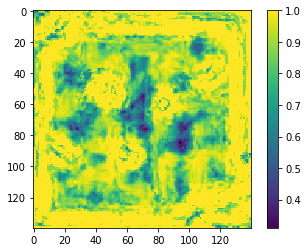

In [13]:
plt.imshow(graph)
plt.colorbar()

In [14]:
import numpy as np
from numpy.lib.stride_tricks import as_strided

def pool2d(A, kernel_size, stride, padding, pool_mode='max'):
    '''
    2D Pooling

    Parameters:
        A: input 2D array
        kernel_size: int, the size of the window
        stride: int, the stride of the window
        padding: int, implicit zero paddings on both sides of the input
        pool_mode: string, 'max' or 'avg'
    '''
    # Padding
    A = np.pad(A, padding, mode='constant')

    # Window view of A
    output_shape = ((A.shape[0] - kernel_size)//stride + 1,
                    (A.shape[1] - kernel_size)//stride + 1)
    kernel_size = (kernel_size, kernel_size)
    A_w = as_strided(A, shape = output_shape + kernel_size, 
                        strides = (stride*A.strides[0],
                                   stride*A.strides[1]) + A.strides)
    A_w = A_w.reshape(-1, *kernel_size)

    # Return the result of pooling
    if pool_mode == 'max':
        return A_w.max(axis=(1,2)).reshape(output_shape)
    elif pool_mode == 'avg':
        return A_w.mean(axis=(1,2)).reshape(output_shape)

In [15]:
x=graph
y=np.array([np.array(xi) for xi in x])

In [16]:
c = pool2d(y, kernel_size=3, stride=5, padding=0, pool_mode='avg')

In [17]:
c.shape

(28, 28)

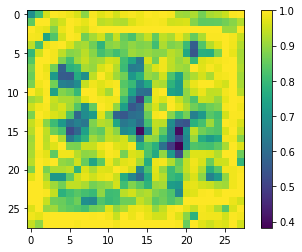

In [18]:
plt.imshow(c)
plt.colorbar()

In [19]:
graph = c

In [20]:
graph = list(graph)
for row in range(len(graph)):
    graph[row] = list(graph[row])

In [21]:
graph_size = len(graph)
graph_size

28

In [22]:
start = (14, 14)
end = (8, 18)

In [23]:
%%time

path = astar(graph, start, end)

CPU times: user 4.9 ms, sys: 11.1 ms, total: 16 ms
Wall time: 5.29 ms


In [24]:
def get_index(node):
    # gets the index of a specified node (eg. row and column)
    # accepts node in float(), returns float()
    row = node // graph_size
    column = node % graph_size
    return row, column

def convert_number_range(OldValue, OldMin, OldMax, NewMin, NewMax):
    # function to account for origin (0 - 600cm => -300cm to 300 cm)
    OldRange = (OldMax - OldMin)  
    NewRange = (NewMax - NewMin)  
    NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
    return NewValue

def node_to_pixel(node):
    # caclulate the pixel coordinates of a node
    row, column = get_index(node)
    x = convert_number_range(column, 0, graph_size-1, 0, 480)
    y = convert_number_range(row, 0, graph_size-1, 0, 480)
    return x, y

In [25]:
path

[(14, 14),
 (13, 14),
 (12, 14),
 (11, 14),
 (10, 14),
 (10, 15),
 (9, 15),
 (9, 16),
 (9, 17),
 (9, 18),
 (8, 18)]

In [26]:
x_list = []
y_list = []
for pos in path:
    node = (pos[1]*graph_size) + pos[0]
    pix_x, pix_y = node_to_pixel(node)
    x_list.append(pix_x)
    y_list.append(pix_y)

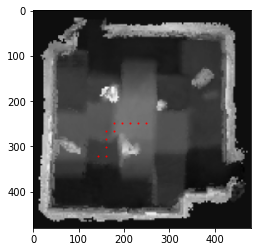

In [27]:
img = plt.imread("mc202.png")
fig, ax = plt.subplots()
ax.scatter(x_list, y_list, s = 1, color="red")
im = ax.imshow(img)

In [28]:
# print(path)

In [29]:
# # show path
# for row in range(len(maze)):
#     for column in range(len(maze[0])):
#         if (row, column) in path:
#             maze[row][column] = 5
# #             print(maze[row][column])
# #         if arrayisin(np.array([row, column]), path):
# #             Z[row, column] = 5